In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

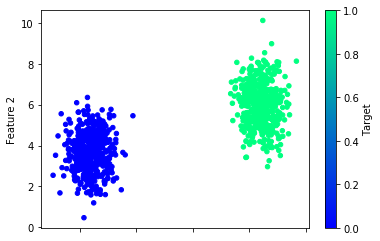

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 2s 2ms/sample - loss: 0.5448 - accuracy: 0.9733
Epoch 2/100
750/750 [==============================] - 0s 101us/sample - loss: 0.5325 - accuracy: 1.0000
Epoch 3/100
750/750 [==============================] - 0s 107us/sample - loss: 0.5201 - accuracy: 1.0000
Epoch 4/100
750/750 [==============================] - 0s 113us/sample - loss: 0.5076 - accuracy: 1.0000
Epoch 5/100
750/750 [==============================] - 0s 111us/sample - loss: 0.4949 - accuracy: 1.0000
Epoch 6/100
750/750 [==============================] - 0s 101us/sample - loss: 0.4822 - accuracy: 1.0000
Epoch 7/100
750/750 [==============================] - 0s 96us/sample - loss: 0.4697 - accuracy: 1.0000
Epoch 8/100
750/750 [==============================] - 0s 195us/sample - loss: 0.4572 - accuracy: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 111us/sample - loss: 0.4449 - accuracy: 1.0000
Epoch 10/100
750/750 [===============

750/750 [==============================] - 0s 116us/sample - loss: 0.0989 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 102us/sample - loss: 0.0972 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 99us/sample - loss: 0.0956 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 77us/sample - loss: 0.0941 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 74us/sample - loss: 0.0926 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 77us/sample - loss: 0.0911 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 87us/sample - loss: 0.0896 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 99us/sample - loss: 0.0882 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 102us/sample - loss: 0.0868 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 101us/

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df.head()

,loss,accuracy
1,0.544780,0.973333
2,0.532548,1.000000
3,0.520100,1.000000
4,0.507554,1.000000
5,0.494893,1.000000


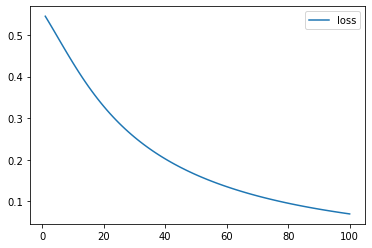

In [13]:
# Plot the loss
history_df.plot(y="loss")

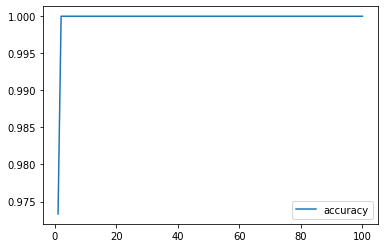

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0613 - accuracy: 1.0000
Loss: 0.07105828872323036, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [17]:
# Non-Linear Data section below

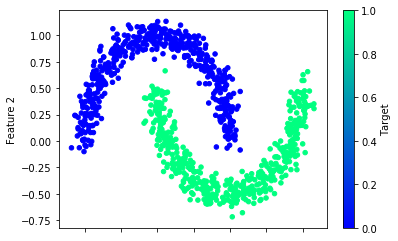

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 137us/sample - loss: 1.2061 - accuracy: 0.4480
Epoch 2/100
750/750 [==============================] - 0s 79us/sample - loss: 1.0862 - accuracy: 0.4680
Epoch 3/100
750/750 [==============================] - 0s 105us/sample - loss: 1.0048 - accuracy: 0.4813
Epoch 4/100
750/750 [==============================] - 0s 80us/sample - loss: 0.9478 - accuracy: 0.4880
Epoch 5/100
750/750 [==============================] - 0s 80us/sample - loss: 0.9057 - accuracy: 0.4947
Epoch 6/100
750/750 [==============================] - 0s 86us/sample - loss: 0.8713 - accuracy: 0.5067
Epoch 7/100
750/750 [==============================] - 0s 114us/sample - loss: 0.8440 - accuracy: 0.5120
Epoch 8/100
750/750 [==============================] - 0s 108us/sample - loss: 0.8203 - accuracy: 0.5213
Epoch 9/100
750/750 [==============================] - 0s 91us/sample - loss: 0.7997 - accuracy: 0.5293
Epoch 10/100
750/750 [=================

750/750 [==============================] - 0s 112us/sample - loss: 0.4398 - accuracy: 0.7667
Epoch 79/100
750/750 [==============================] - 0s 118us/sample - loss: 0.4363 - accuracy: 0.7693
Epoch 80/100
750/750 [==============================] - 0s 99us/sample - loss: 0.4329 - accuracy: 0.7707
Epoch 81/100
750/750 [==============================] - 0s 98us/sample - loss: 0.4297 - accuracy: 0.7720
Epoch 82/100
750/750 [==============================] - 0s 95us/sample - loss: 0.4262 - accuracy: 0.7813
Epoch 83/100
750/750 [==============================] - 0s 104us/sample - loss: 0.4230 - accuracy: 0.7827
Epoch 84/100
750/750 [==============================] - 0s 102us/sample - loss: 0.4196 - accuracy: 0.7853
Epoch 85/100
750/750 [==============================] - 0s 176us/sample - loss: 0.4161 - accuracy: 0.7880
Epoch 86/100
750/750 [==============================] - 0s 91us/sample - loss: 0.4126 - accuracy: 0.7920
Epoch 87/100
750/750 [==============================] - 0s 72us

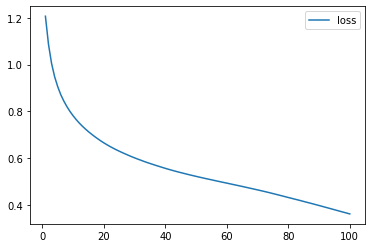

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

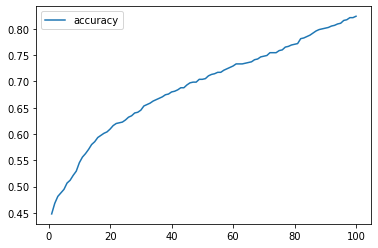

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7072 - accuracy: 0.5667
Epoch 2/100
750/750 [==============================] - 0s 95us/sample - loss: 0.6596 - accuracy: 0.6493
Epoch 3/100
750/750 [==============================] - 0s 92us/sample - loss: 0.6191 - accuracy: 0.7013
Epoch 4/100
750/750 [==============================] - 0s 91us/sample - loss: 0.5831 - accuracy: 0.7387
Epoch 5/100
750/750 [==============================] - 0s 90us/sample - loss: 0.5516 - accuracy: 0.7680
Epoch 6/100
750/750 [==============================] - 0s 84us/sample - loss: 0.5234 - accuracy: 0.7973
Epoch 7/100
750/750 [==============================] - 0s 87us/sample - loss: 0.4979 - accuracy: 0.8280
Epoch 8/100
750/750 [==============================] - 0s 88us/sample - loss: 0.4746 - accuracy: 0.8413
Epoch 9/100
750/750 [==============================] - 0s 83us/sample - loss: 0.4536 - accuracy: 0.8600
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 75us/sample - loss: 0.2273 - accuracy: 0.9027
Epoch 79/100
750/750 [==============================] - 0s 166us/sample - loss: 0.2272 - accuracy: 0.9027
Epoch 80/100
750/750 [==============================] - 0s 75us/sample - loss: 0.2270 - accuracy: 0.9027
Epoch 81/100
750/750 [==============================] - 0s 72us/sample - loss: 0.2268 - accuracy: 0.9027
Epoch 82/100
750/750 [==============================] - 0s 111us/sample - loss: 0.2266 - accuracy: 0.9027
Epoch 83/100
750/750 [==============================] - 0s 110us/sample - loss: 0.2264 - accuracy: 0.9027
Epoch 84/100
750/750 [==============================] - 0s 86us/sample - loss: 0.2263 - accuracy: 0.9027
Epoch 85/100
750/750 [==============================] - 0s 81us/sample - loss: 0.2261 - accuracy: 0.9027
Epoch 86/100
750/750 [==============================] - 0s 80us/sample - loss: 0.2260 - accuracy: 0.9027
Epoch 87/100
750/750 [==============================] - 0s 80us/s